<a href="https://colab.research.google.com/github/mitrarokni2019/AI4IA/blob/main/AI4IA_Assignment3_taskD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code Template for Fitting parameteric predictive models  with PyTorch
import torch
import numpy
import io
from torch import autograd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving dataset_Bactrian.csv to dataset_Bactrian.csv
Saving dataset_Marvin_Minsky.csv to dataset_Marvin_Minsky.csv
Saving dataset_SteelAI.csv to dataset_SteelAI.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['dataset_SteelAI.csv']))
X =torch.tensor(df1.iloc[:,0].values,requires_grad=False)      # THESE SHOULD HAVE requires_grad = FALSE
y_true =torch.tensor(df1.iloc[:,1].values,requires_grad=False) #THESE SHOULD HAVE requires_grad = FALSE

# MODEL: define your parametric model
def model(X, a, b):
  return a*X+b
  
# LOSS FUNCTION: Define your loss function15def loss_function(y_pred, y_true):
def loss_function(y_pred,y_true):
  return torch.pow(y_true-y_pred,2.0)
  

# COST FUNCTION: Define your cost function
def cost_function(y_pred, y_true):
  loss_over_data=loss_function(y_pred, y_true)
  return torch.mean(loss_over_data)
    
# INITIALIZATION:
eta=0.1
max_iterations=10000
a  = torch.randn(size=[1],requires_grad=True)# inital guess of params
b = torch.randn(size=[1],requires_grad=True)# inital guess of params

print("random a: ",a)
print("random b: ",b)



# Fitting- / Learning- / Training-loop
trajectory=[]
iters=[]
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X=X, a=a, b=b)
  # Compute loss associated with current params
  cost = cost_function(y_preds, y_true) # J
  trajectory.append(cost.item())
  iters.append(iteration_i)
  
  # Compute gradient of loss function for current params
  cost.backward() # dJ/dW
      
  # Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
    
    # Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()
print("a is : ", a)
print("b is : ",b)
print("cost:" , trajectory[-1])



  
  #if# some stopping criteria fullfiled
  #break


random a:  tensor([-1.1042], requires_grad=True)
random b:  tensor([0.6225], requires_grad=True)
a is :  tensor([0.7843], requires_grad=True)
b is :  tensor([0.1031], requires_grad=True)
cost: 0.0014836133945430616


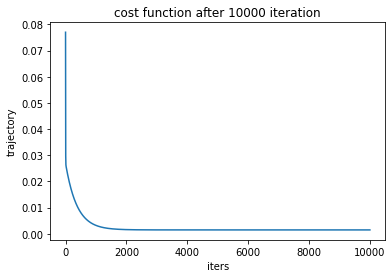

[0.07702117717432672, 0.05854386019055591, 0.046836884004835634, 0.039410393828697834, 0.034690246358789756, 0.03168119599219787, 0.029754026720065566, 0.02851092224529196, 0.027700375575117286, 0.02716336854101293, 0.0267993699794825, 0.026544818250254596, 0.026359528433076942, 0.026218094043215855, 0.026104452655523917, 0.026008445873685816, 0.02592365547034979, 0.02584602028055984, 0.025772972935966677, 0.02570289043304437, 0.025634749072103457, 0.025567894987553155, 0.025501921828964297, 0.02543656928648719, 0.025371670184338658, 0.025307123679276025, 0.025242862183075303, 0.02517884358826092, 0.02511504423664254, 0.02505144341386354, 0.02498803297980921, 0.024924802921843653, 0.024861751169604762, 0.024798873125608623, 0.024736166547987822, 0.0246736313249591, 0.024611265704784162, 0.024549065820317705, 0.024487034525913005, 0.024425169481554657, 0.024363471797927038, 0.024301939695462953, 0.0242405748007318, 0.024179373153216912, 0.024118336747543406, 0.024057464669681554, 0.0239

In [ ]:
plt.plot(iters,trajectory)
plt.title(f"cost function after {max_iterations} iteration")
plt.ylabel('trajectory')
plt.xlabel('iters')
plt.show()

print(trajectory)
print(len(trajectory))
print(min(trajectory))
print(trajectory[-1])
print(trajectory[-2])
print(trajectory[800])
print(trajectory[850])

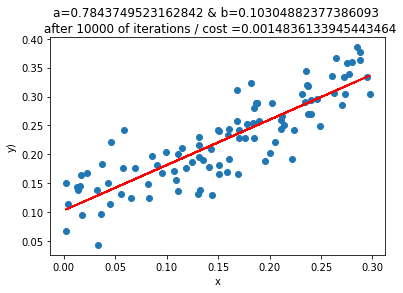

In [ ]:
YY= model(X, a, b)
plt.scatter(X.numpy(), y_true.numpy()) 
plt.plot(X.detach().numpy(),YY.detach().numpy(), color='red')  # regression line
# title
plt.title(f"a={a.item()} & b={b.item()} \n after {max_iterations} of iterations / cost ={trajectory[-1]}")
plt.ylabel('y)')
plt.xlabel('x')
plt.show()


datatset B

In [ ]:
# Code Template for Fitting parameteric predictive models  with PyTorch
import torch
import numpy
from torch import autograd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving dataset_Marvin_Minsky.csv to dataset_Marvin_Minsky.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['dataset_Marvin_Minsky.csv']))
df2

,x,y
0,44.534092,2.154690
1,17.457317,1.831702
2,40.618217,2.135447
3,67.102280,2.368806
4,11.144817,1.264841
...,...,...
195,68.951350,1.891954
196,38.791664,2.139344
197,11.335820,1.211371
198,75.454130,2.486372


First guess: Michaelis-Menten type model:

random a:  tensor([0.2023], requires_grad=True)
random b:  tensor([0.4443], requires_grad=True)
a is :  tensor([2.3749], requires_grad=True)
b is :  tensor([3.7982], requires_grad=True)
cost : 0.08819175529222412


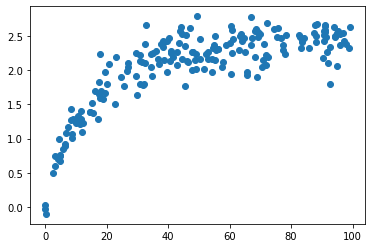

In [ ]:
X =torch.tensor(df2.iloc[:,0].values,requires_grad=False)      # THESE SHOULD HAVE requires_grad = FALSE
y_true =torch.tensor(df2.iloc[:,1].values,requires_grad=False) #THESE SHOULD HAVE requires_grad = FALSE

#plt.scatter(X.numpy(), y_true.numpy())


# MODEL: define your parametric model
def model(X, a, b):
  return (a*X)/(b+X)
  
# LOSS FUNCTION: Define your loss function15def loss_function(y_pred, y_true):
def loss_function(y_pred,y_true):
  return torch.pow(y_true-y_pred,2.0)
  

def cost_function(y_pred, y_true):
  loss_over_data=loss_function(y_pred,y_true)
  return torch.mean(loss_over_data)
    
# INITIALIZATION:
eta=0.01
max_iterations=10000
a  = torch.randn(size=[1],requires_grad=True)# inital guess of params
b = torch.randn(size=[1],requires_grad=True)# inital guess of params

print("random a: ",a)
print("random b: ",b)



# Fitting- / Learning- / Training-loop
iters_2=[]
trajectory_2=[]
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X=X, a=a, b=b)
  # Compute loss associated with current params
  cost = cost_function(y_preds, y_true) # J
  trajectory_2.append(cost.item())
  iters_2.append(iteration_i)
  
  # Compute gradient of loss function for current params
  cost.backward() # dJ/dW
      
  # Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
    
    # Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()
print("a is : ", a)
print("b is : ",b)
print("cost :", trajectory_2[-1])



  
  #if# some stopping criteria fullfiled
  #break


[3.7313794014236663, 3.5989884865987425, 3.471595233443164, 3.3490108734891737, 3.2310538133877476, 3.1175493237436878, 3.008329291652143, 2.903232170380893, 2.8021023558086737, 2.7047903498703967, 2.61115198683285, 2.521048787394354, 2.4343476543068414, 2.3509202478414237, 2.270643159864544, 2.1933975706021034, 2.1190692470404953, 2.0475483748263326, 1.9787290828401454, 1.9125094659700925, 1.8487915931672005, 1.7874812134329263, 1.7284876213331994, 1.6717233955981368, 1.6171045621612126, 1.564550059443123, 1.513982175537227, 1.4653260250695093, 1.4185094556221003, 1.3734632017537505, 1.3301202853262857, 1.2884164331419385, 1.2482899712318676, 1.209681257182599, 1.1725328546668456, 1.1367899000371582, 1.1023991180350574, 1.0693094313095712, 1.037471873972163, 1.006839093443489, 0.9773655094077625, 0.9490072502883078, 0.9217220948305814, 0.8954696035569993, 0.870210670920987, 0.8459078562613782, 0.8225247744420935, 0.8000267835308027, 0.7783802107606428, 0.7575530160289755, 0.7375140481

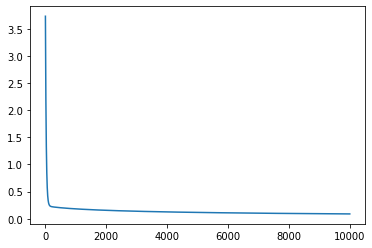

In [ ]:
plt.plot(iters_2,trajectory_2)
plt.title(f"cost function after {max_iterations} iteration")
plt.ylabel('trajectory')
plt.xlabel('iters')
plt.show()
print(trajectory_2)
print(len(trajectory_2))
print(min(trajectory_2))
print(trajectory_2[-1])
print(trajectory_2[-2])

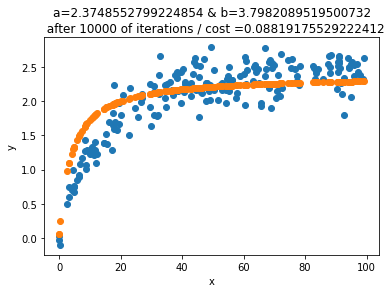

In [ ]:

YY= model(X, a, b)
plt.scatter(X.numpy(), y_true.numpy()) 
plt.scatter(X.detach().numpy(),YY.detach().numpy())  # regression line
# title

plt.title(f"a={a.item()} & b={b.item()}\n  after {max_iterations} of iterations / cost ={trajectory_2[-1]}")
plt.ylabel('y')
plt.xlabel('x')
plt.show()


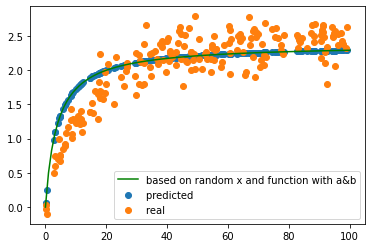

In [ ]:

import numpy as np
import numpy

x = np.linspace(0,100,100)
yy= (a.detach().numpy() * x)/(b.detach().numpy() +x)

# the function
y = (a.detach().numpy() * X.detach().numpy())/(b.detach().numpy() +X.detach().numpy())

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#
plt.plot(x,yy,'g', label="based on random x and function with a&b")
# plot the function
plt.scatter(X,y,label='predicted ')
# plot the true x & y from dataset
plt.scatter(X.numpy(), y_true.numpy(),label='real ')
#plt.plot(X.detach().numpy(),yy.detach().numpy(),'g')  # 
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend(loc='lower right')
plt.show()

second guess: Arrhenius type model:

random a:  tensor([0.6039], requires_grad=True)
random b:  tensor([1.5872], requires_grad=True)
a is :  tensor([2.2429], requires_grad=True)
b is :  tensor([1.7415], requires_grad=True)


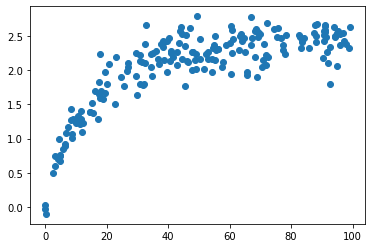

In [ ]:
X =torch.tensor(df2.iloc[:,0].values,requires_grad=False)      # THESE SHOULD HAVE requires_grad = FALSE
y_true =torch.tensor(df2.iloc[:,1].values,requires_grad=False) #THESE SHOULD HAVE requires_grad = FALSE

#plt.scatter(X.numpy(), y_true.numpy())


# MODEL: define your parametric model
def model(X, a,b):
  return a* torch.exp(-b/X)
  
# LOSS FUNCTION: Define your loss function15def loss_function(y_pred, y_true):
def loss_function(y_pred,y_true):
  return torch.pow(y_true-y_pred,2.0)
  

def cost_function(y_pred, y_true):
  loss_over_data=loss_function(y_pred,y_true)
  return torch.mean(loss_over_data)
    
# INITIALIZATION:
eta=0.0001
max_iterations=50000
a  = torch.randn(size=[1],requires_grad=True)# inital guess of params
b = torch.randn(size=[1],requires_grad=True)# inital guess of params

print("random a: ",a)
print("random b: ",b)

# Fitting- / Learning- / Training-loop
iters_3=[]
trajectory_3=[]
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X=X, a=a, b=b)
  # Compute loss associated with current params
  cost = cost_function(y_preds, y_true) # J
  trajectory_3.append(cost.item())
  iters_3.append(iteration_i)
  
  # Compute gradient of loss function for current params
  cost.backward() # dJ/dW
      
  # Update params via Gradient Decent update
  with torch.no_grad():
    a -= eta*a.grad
    b -= eta*b.grad
    
    # Reset gradients back to zero
  a.grad.zero_()
  b.grad.zero_()
print("a is : ", a)
print("b is : ",b)



  
  #if# some stopping criteria fullfiled
  #break


[2.4659352996658233, 2.4651200520810908, 2.464305117429152, 2.4634904956206745, 2.46267618656634, 2.4618620201521253, 2.461048161184493, 2.460234614760263, 2.4594213807901797, 2.4586084591850046, 2.4577958498555197, 2.4569833828665115, 2.456171228034342, 2.4553593852698286, 2.45454785448381, 2.4537366355871395, 2.452925728490691, 2.4521149634378734, 2.4513045100665516, 2.4504943682876363, 2.4496845380120558, 2.4488750191507593, 2.448065811614713, 2.4472567458257606, 2.4464479912434554, 2.445639547778801, 2.4448314153428186, 2.44402359384655, 2.4432160832010545, 2.442408714006425, 2.441601655544089, 2.4407949077251434, 2.4399884704607024, 2.4391823436618996, 2.438376527239888, 2.4375708519728234, 2.436765486964194, 2.4359604321251886, 2.435155687367016, 2.4343512526009015, 2.433547127738091, 2.4327431437346174, 2.4319394695162146, 2.431136104994166, 2.4303330500797724, 2.429530304684352, 2.4287278687192444, 2.427925573318171, 2.427123587229301, 2.4263219103640092, 2.4255205426336897, 2.

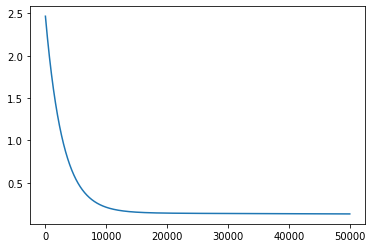

In [ ]:
plt.plot(iters_3,trajectory_3)
plt.title(f"cost function after {max_iterations} iteration")
plt.ylabel('trajectory')
plt.xlabel('iters')
plt.show()

print(trajectory_3)
print(len(trajectory_3))
print(min(trajectory_3))
print(trajectory_3[-1])
print(trajectory_3[-2])

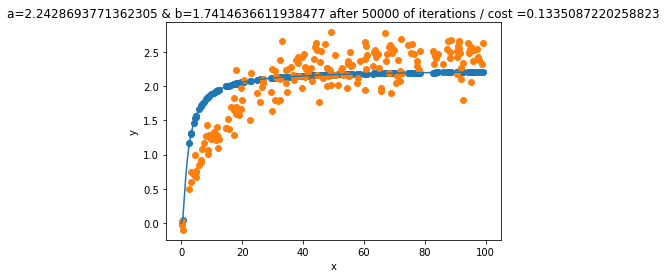

In [ ]:
YY= model (X, a.item(),b.item())
plt.scatter(X.detach().numpy(), YY.detach().numpy())

xx=torch.linspace(0,100,200)
YY= model(xx, a.item(), b.item())
plt.scatter(X.detach().numpy(), y_true.numpy()) 
plt.plot(xx,YY) 
# title

plt.title(f"a={a.item()} & b={b.item()} after {max_iterations} of iterations / cost ={trajectory_3[-1]}")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

**dataset 4:**

In [ ]:
# Code Template for Fitting parameteric predictive models  with PyTorch
import torch
import numpy
from torch import autograd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving dataset_WuTang.csv to dataset_WuTang.csv


In [ ]:
import io
df4 = pd.read_csv(io.BytesIO(uploaded['dataset_WuTang.csv']))
df4

,x,y
0,14.452201,47.374195
1,4.138188,7.362954
2,11.610455,16.517042
3,7.328853,24.045029
4,14.673833,59.872930
...,...,...
208,2.114737,19.212246
209,3.005472,16.429071
210,0.105627,53.321600
211,14.049532,54.071100


**First Guess: quadratic & normal**

In [ ]:
X =torch.tensor(df4.iloc[:,0].values,requires_grad=False)      # THESE SHOULD HAVE requires_grad = FALSE
y_true =torch.tensor(df4.iloc[:,1].values,requires_grad=False) #THESE SHOULD HAVE requires_grad = FALSE

#plt.scatter(X.numpy(), y_true.numpy())


# MODEL: define your parametric model
def model(X, a1,b,a2,m,v):
  return a2* torch.exp(- (torch.pow(X-m,2)/v))+torch.pow(X-a1, 2)+ b
  
# LOSS FUNCTION: Define your loss function15def loss_function(y_pred, y_true):
def loss_function(y_pred,y_true):
  return torch.pow((y_true-y_pred),2)
  

def cost_function(y_pred, y_true):
  loss_over_data=loss_function(y_pred,y_true)
  return torch.mean(loss_over_data)
    
# INITIALIZATION:
eta=0.01
max_iterations=2000
a1  = torch.tensor([7.0],requires_grad=True)# inital guess of params
a2= torch.tensor([40.0],requires_grad=True)# inital guess of params
b= torch.tensor([-1.0],requires_grad=True)# inital guess of params
m=torch.tensor([7.0],requires_grad=True)# inital guess of params
v= torch.tensor([0.5],requires_grad=True)# inital guess of params


print("random a1: ",a1)
print("random b: ",b)
print("random a2: ",a2)
print("random m: ",m)
print("random v: ",v)

# Fitting- / Learning- / Training-loop
iters_4=[]
trajectory_4=[]
for iteration_i in range(max_iterations):
  # Predict from current model with current params
  y_preds = model(X, a1=a1,b=b,a2=a2,m=m,v=v)
  # Compute loss associated with current params
  cost = cost_function(y_preds, y_true) # J
  #print(cost.item())
  trajectory_4.append(cost.item())
  iters_4.append(iteration_i)
  
  # Compute gradient of loss function for current params
  cost.backward() # dJ/dW
      
      
  # Update params via Gradient Decent update
  with torch.no_grad():
    a1 -= eta * a1.grad
    b -= eta * b.grad
    a2 -= eta * a2.grad
    m -= eta * m.grad
    v -= eta * v.grad
    
    # Reset gradients back to zero
  a1.grad.zero_()
  b.grad.zero_()
  a2.grad.zero_()
  m.grad.zero_()
  v.grad.zero_()


print("a1 is : ", a1.item())
print("b is : ",b.item())
print("a2 is : ",a2.item())
print("m is : ",m.item())
print("v is : ", v.item())
print("cost :", trajectory_4[-1])


  
  #if# some stopping criteria fullfiled
  #break


random a1:  tensor([7.], requires_grad=True)
random b:  tensor([-1.], requires_grad=True)
random a2:  tensor([40.], requires_grad=True)
random m:  tensor([7.], requires_grad=True)
random v:  tensor([0.5000], requires_grad=True)
a1 is :  7.0546722412109375
b is :  0.2497742623090744
a2 is :  29.81188201904297
m is :  7.033648490905762
v is :  0.8541988134384155
cost : 31.429569847044334


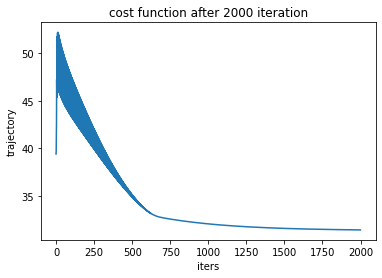

[39.40314162412844, 39.67865234804428, 41.285310961221306, 42.78685435333703, 47.23695163180664, 45.347891636093436, 50.73512196446799, 46.02797254263859, 51.76251402275472, 46.268073706812395, 52.142567198040744, 46.29961183220568, 52.19765307375455, 46.24760547223805, 52.12129732960495, 46.16494266498172, 51.99671920224864, 46.07240945831222, 51.85642746813181, 45.97792090489385, 51.712765049949034, 45.88445311759542, 51.5702773883449, 45.793048807562464, 51.43053664785874, 45.70405096839292, 51.294105933016766, 45.61740732956807, 51.160930886468805, 45.53310496558937, 51.0309734601507, 45.45098427311435, 50.904026896898095, 45.3709581539845, 50.77999355310207, 45.29287068667754, 50.65860596378771, 45.21663946274897, 50.539763304653995, 45.14214644532505, 50.423304294321035, 45.069294808688134, 50.309113903319705, 44.99795423367933, 50.196994177995286, 44.92808219292826, 50.08687963869815, 44.859592011778204, 49.97865099376073, 44.79238637678036, 49.872185734472566, 44.7264015706991,

In [ ]:
plt.plot(iters_4,trajectory_4)
plt.title(f"cost function after {max_iterations} iteration")
plt.ylabel('trajectory')
plt.xlabel('iters')
plt.show()

print(trajectory_4)
print(len(trajectory_4))
print(min(trajectory_4))
print(trajectory_4[-1])
print(trajectory_4[-2])

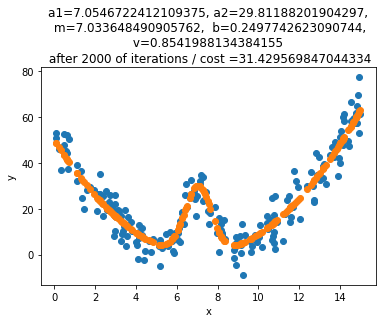

In [ ]:
YY= model(X, a1=a1.item(),b=b.item(),a2=a2.item(), m=m.item(), v=v.item())
plt.scatter(X.detach().numpy(),y_true.detach().numpy())
plt.scatter(X.detach().numpy(),YY.detach().numpy()) 


# title
plt.title(f"a1={a1.item()}, a2={a2.item()},\n m={m.item()},  b={b.item()},\n v={v.item()} \n after {max_iterations} of iterations / cost ={trajectory_4[-1]}")
plt.ylabel('y')
plt.xlabel('x')
plt.show()